# __Scenario D:__<br>Time-dependent enzyme inactivation

Data provided by Paulo Durão (Microbial & Enzyme Technology, Instituto de Tecnologia Química e Biológica, Oeiras, Portugal)

## Project background
All investigated enzyme reaction without inhibitor showed progress curves behavior, which was not explainable by irreversible Michaelis-Menten kinetics. SUBSTRATE PRODUCT INHIBITION. All experiments had in commmon, that enzyme reactions were carried out in 96-well polystyrene micro titer plates (MTP), whereas the change in substrate and or product absorption was monitored photometrically. 
One hypothesis for the observed time-dependent decrease of enzyme activity is potential hydrophobic interaction between the enzyme and the MTP suface. Thereby, hydrophobic regions of the enzyme's surface might interact with the hydrophobic reaction vessle, ultimately preventing substrate access to the active site of the enzyme.  
In order to test the hypothesis, an absorption experiment in which enzyme was incubated in MTP wells prior to reaction start was performed. Thereby, the enzyme activity should decrease with regard to the prior incubation time. If the hypothesis is correct, the calculated half life from the adsorption experiment 
should match with the half life of an enzyme kinetics experiment which was conducted in parallel.

For this experiment Co




__Show results of enzyme inactication across projects__ #TODO

All investigated enzyme reactions in this thesis showed a time-dependent decrease in catalytic activity, which was not explainable by the irreversible Michaelis-Menten model.

### Experimental design

CotA laccase from *Bacillus subtilis*
Both experiments wer conducted with CotA from 

__Determination of enzyme inactivation trough adsorption__  
In order to test the hypothesis of time-dependent enzyme inactivation through adsorption to the MTP surface, the following experiment was conducted. Thereby, enzyme solution was incubated in individual MTP wells up to 1 h, prior to reaction start.  Then, individual enzyme reactions were started in triplicates by transferring 2 µL of incubated enzyme in 10 min increments. Each proceeding enzyme reaction contained 256 nM CotA, 1 mM ABTS and was buffered in acetate buffer at pH 4. Product formation was followed photometrically at 420 nm and 25°C for 5 min, whereas concentrations were calculated assuming an extincion coefficient of ε = 36000 M<sup>-1</sup>cm<sup>-1</sup> for the ABTS radical product.

__Enzyme kinetics experiment__  
Enzymatic oxidation of ABTS to its radical form was followed photometrically at 420 nm at 25°C for 70 min. 
Thereby, ABTS was applied in a range from 0.01 mM - 2 mM. Each proceeding enzyme reaction contained 256 nM CotA, and was buffered in acetate buffer at pH 4.
Repeats of 4.

### Experimantal data

Experimantal data was provided as an Excel file, containing time-course absorption data. Meta data was written into the EnzymeML Excel template. Then, the experimantal data was written to an EnzymeML document by a parser function. Concentrations were calculated via the provided extinction coefficient of the ABTS radical (ε = 36000 M<sup>-1</sup>cm<sup>-1</sup>). 

## Adsorption of enzyme to micro titer plate surface

### Imports

In [128]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
import pyenzyme as pe
from EnzymePynetics.tools.parameterestimator import ParameterEstimator
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import display


#TODO warning in EnzymePynetics

import warnings
warnings.filterwarnings('ignore')

### Experimantal data

Experimental data was provided as an Excel file. Data was loaded into an pandas DataFrame and the slopes of each incubation condition were calculated through linear regression. The resulting initial rates were used to calculate by which the enzyme activity decreases in regard to the incubation time tin the reaction vessel. Lastly the half life of the enzyme was calculated with equation {eq}`enzyme_halflife`.

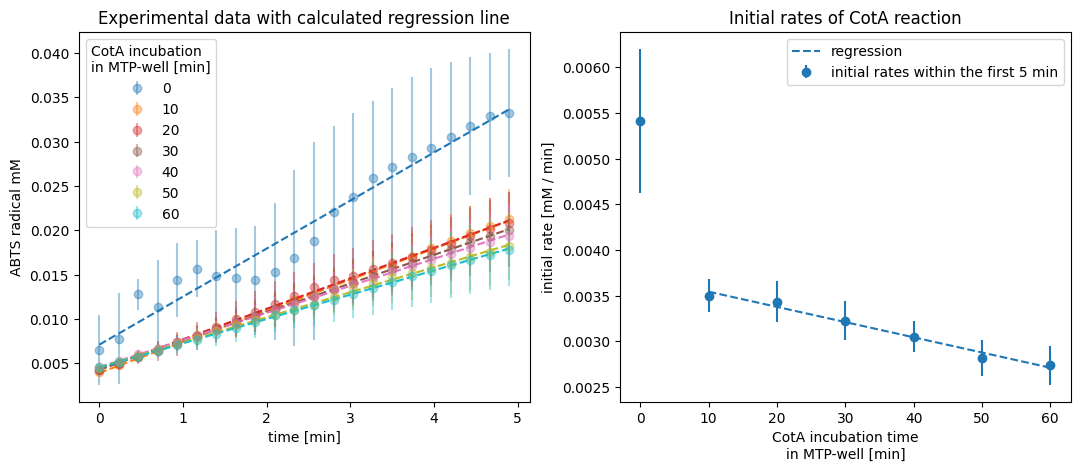

Calculated enzyme half life based on regression slope: 693.73 h


In [129]:
# Load excel
path = '../../data/enzyme_inactivation/Slide 2 - Activity effect of incubating CotA in MTP.xlsx'
df = pd.read_excel(path, sheet_name='csv').set_index('time (min)')

# replace values of '0**' with nan-values, since the measurement is incorrect
df['0**'] = np.nan



# Get data from Excel file
columns = [int(x) for x in list(df.columns) if str(x).endswith("0")]
time = df.index.values
absorption = df.values.T.reshape(7,3,22)

# Calculate concentrations
extinction_coefficient = 36 # (1/mM * 1/cm)
optical_length = 0.65 # cm

def absorption_to_concentration(abso):
    return abso / (extinction_coefficient*optical_length)

concentration = absorption_to_concentration(absorption)
concentration_mean = np.nanmean(concentration, axis = 1)
concentration_std = np.nanstd(concentration, axis = 1)

# Linear regression
slopes = []
intercepts = []
stderrs = []
for time_set in concentration:
    mask = ~np.isnan(time_set)
    time_regression = np.tile(time, 3).reshape(mask.shape)[mask].flatten()
    data_regression = time_set[mask].flatten()
    slope,intercept,_,_,stderr = (linregress(time_regression, data_regression))
    slopes.append(slope)
    intercepts.append(intercept)
    stderrs.append(stderr)

# Regression of the slopes between 10 and 60 mincolumns
slope_of_slopes, intercept_of_slopes,_,_,_ = linregress(columns[1:], slopes[1:])

# Half life in hours
t12 = (np.log(2)/-slope_of_slopes)/60

# Plot results
colors = cm.tab10(np.linspace(0, 1, len(absorption)))
fig, axes = plt.subplots(1,2, figsize=(12.8,4.8), sharey=False, sharex=False)

for mean, std, label, slope, intercept, color in zip(concentration_mean, concentration_std, columns, slopes, intercepts, colors):
    axes[0].errorbar(time, mean, std, fmt='o', label=label, alpha = 0.4, color=color)
    axes[0].plot(np.array(time), np.array(time)*slope+intercept, '--', color=color)
    axes[0].legend(title="CotA incubation\nin MTP-well [min]")
    axes[0].set_ylabel('ABTS radical mM')
    axes[0].set_xlabel('time [min]')
    axes[0].set_title('Experimental data with calculated regression line')


axes[1].errorbar(columns, slopes, stderrs, fmt='o', label="initial rates within the first 5 min")
axes[1].set_xlabel("CotA incubation time\nin MTP-well [min]")
axes[1].set_ylabel('initial rate [mM / min]')
axes[1].plot(np.array(columns[1:]), slope_of_slopes*np.array(columns[1:])+intercept_of_slopes, "--", color=colors[0], label=f"regression")
axes[1].legend()
axes[1].set_title('Initial rates of CotA reaction')

plt.show()

print(f"Calculated enzyme half life based on regression slope: {t12:.2f} h")

_Fig. XXX: Experimental data and regression results of CotA reaction with different enzyme incubation periods._

The left plot of figure XXX the change in product concentration is shown over the first 5 minutes of the enzyme reaction. Therein, different enzyme incubation times prior to reaction start are color-coded. The first reaction without prior incubation shows large standard deviations between the experimental repeats. This might be the result of insufficient mixing or inconsistent ammount of enzyme between the repeats. All other slopes showed a gradually decreasing slope for increasing incubation times.  
The plot on the right of figure XXX shows the initial rates of the enzyme reactions in relation to prior enzyme incubation time. Based on the calculated rate of deactivation, the half life of the enzyme is approximately 28 day. Due to the high standard deviation between the repeats of the reaction withour prior incubation. The experiments were not considered for the calculation of the inactivation rate.

## Enzyme kinetics experiment

### Experimental data 

Experimental data was provided as excel files, whereas meta data of the experiment was filled in to an EnzymeML Excel spreadsheet. Measurement data was written to the EnzymeML document by a parser function, whereas concentrations were calculated via the provided extinction coefficient.  
Kinetic parameters were estimated with and without considering enzyme inactivation.


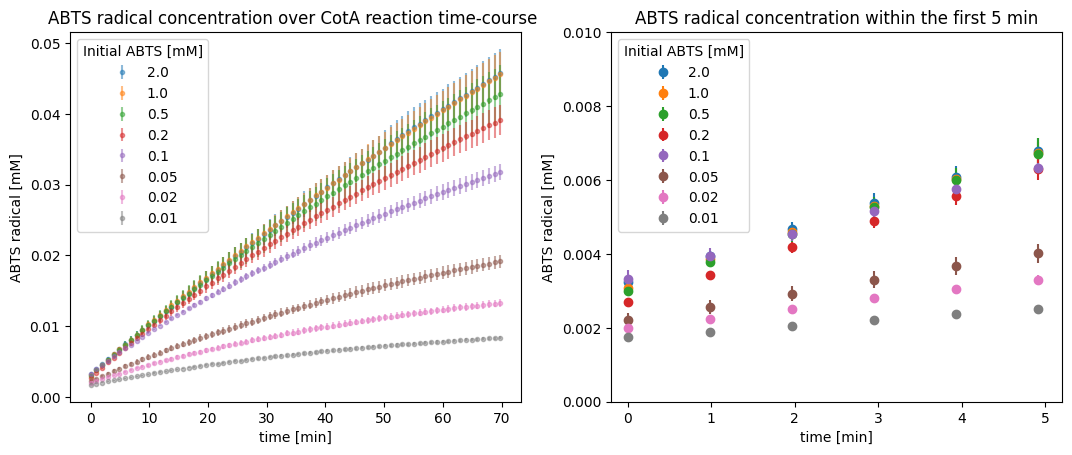

In [169]:
# Load experimental data from excel file
df = pd.read_excel("../../data/enzyme_inactivation/Repetition CotA ABTS kinetics higher volumes 2nd time.xlsx", sheet_name="csv").set_index("Time(min)")
data = df.values.T.reshape(8,4,72)
time = df.index.values

# Calculate concentrations
extinction_coefficient = 36 # (1/mM * 1/cm)
optical_length = 0.65 # cm

def absorption_to_concentration(abso):
    return abso / (extinction_coefficient*optical_length)

concentration_data = absorption_to_concentration(data)


# Parser function
def data_to_EnzymeML(
    template_path: str,
    measurement_data: np.ndarray,
    species_id: str,
    data_unit: str,
    time_unit: str
    ) -> pe.EnzymeMLDocument:

    enzmldoc = pe.EnzymeMLDocument.fromTemplate(template_path)
    for IDs, concentration in zip(enzmldoc.measurement_dict.keys(), measurement_data):
        for counter, replicate in enumerate(concentration):
            rep = pe.Replicate(
                id=f"Measurement{counter}",
                species_id=species_id,
                data=list(replicate),
                data_unit=data_unit,
                time=list(time),
                time_unit=time_unit)
            enzmldoc.getMeasurement(IDs).addReplicates(rep, enzmldoc)
    return enzmldoc

# Write experimantal data to EnzymeML document vis parser function
enzmldoc = data_to_EnzymeML(
    template_path="../../data/enzyme_inactivation/EnzymeML_CotA.xlsm",
    measurement_data=concentration_data,
    species_id="s1",
    data_unit="mmole / l",
    time_unit="min")

# Visualize experimantal data
fig, axes = plt.subplots(1,2, figsize=(12.8, 4.8), sharey=False, sharex=False)
for measurement in enzmldoc.measurement_dict.values():
    concentration = []
    product = measurement.getReactant("s1")
    init_substrate=measurement.getReactant("s0").init_conc
    for replicate in product.replicates:
        concentration.append(replicate.data)
    axes[0].errorbar(time, np.mean(concentration, axis=0), np.std(concentration, axis=0), label=init_substrate,\
        fmt=".", alpha=0.5)
    axes[1].errorbar(time, np.mean(concentration, axis=0), np.std(concentration, axis=0), label=init_substrate,\
        fmt="o")

axes[0].legend(title="Initial ABTS [mM]")
axes[1].legend(title="Initial ABTS [mM]")
axes[0].set_ylabel("ABTS radical [mM]")
axes[0].set_title("ABTS radical concentration over CotA reaction time-course ")
axes[1].set_title("ABTS radical concentration within the first 5 min")
axes[1].set_ylabel("ABTS radical [mM]")
axes[0].set_xlabel("time [min]")
axes[1].set_xlabel("time [min]")
axes[1].set_xlim([-0.2,5.2])
axes[1].set_ylim([0,0.01])
fig.show()


_Fig XXX. ABTS radical concentration over the time-course of CotA reaction._

The provided reaction data showed large deviations between individual repeats of reactions with identical initial ABTS concentrations. Expecially for initial ABTS concentrations above 0.1 mM (Fig. XXX, left). Additionally, measurement data was not blanked, since the first measured data points at 0 min have too high concentration values in relation to their respective slopes.
Furthermore, the order of initial measurement points is expected to reflect the initial substrate concentrations (Fig. XXX right). Thereby, higher initial substrate concentrations should also show a slightly increased product concentration, since ABTS marginally absorbs at the product detection wavelength.  

### Kinetic parameter estimation

Kinetic parameters were estimated for all models with and without considering enzyme inactivation.

In [170]:
# Parameter estimation without time-dependent enzyme inactivation
CotA_kinetics = ParameterEstimator.from_EnzymeML(enzmldoc, "s1", "product")
CotA_kinetics.fit_models(enzyme_inactivation=False, display_output=False)
df = CotA_kinetics.result_dict.drop(columns=["kcat / Km [1/min * 1/mmole / l]"])
df.insert(1, "Enzyme inactivation model", "False")

# Parameter estimation considering time-dependent enzyme inactivation
CotA_kinetics_with_inactivation = ParameterEstimator.from_EnzymeML(enzmldoc, "s1", "product")
CotA_kinetics_with_inactivation.fit_models(enzyme_inactivation=True, display_output=False)
df_inactivation = CotA_kinetics_with_inactivation.result_dict.drop(columns=["kcat / Km [1/min * 1/mmole / l]"])
df_inactivation.insert(1, "Enzyme inactivation model", "True")

results = df.append(df_inactivation).sort_values("AIC")
display(results.style.set_table_attributes('style="font-size: 12px"'))

,AIC,Enzyme inactivation model,kcat [1/min],Km [mmole / l],Ki competitive [mmole / l],Ki uncompetitive [mmole / l],ki time-dep enzyme-inactiv. [1/min]
substrate inhibition,-29337,True,3.209 +/- 0.90%,0.047 +/- 1.73%,-,33.750 +/- 13.18%,0.007 +/- 4.12%
competitive product inhibition,-29300,True,3.058 +/- 0.80%,0.037 +/- 3.55%,0.074 +/- 26.83%,-,0.006 +/- 5.27%
non-competitive product inhibition,-29296,True,3.077 +/- 2.06%,0.037 +/- 5.14%,0.064 +/- 40.49%,0.984 +/- 297.88%,0.006 +/- 29.07%
irreversible Michaelis Menten,-29287,True,3.095 +/- 0.77%,0.043 +/- 1.30%,-,-,0.007 +/- 4.18%
uncompetitive product inhibition,-29283,True,3.102 +/- 0.99%,0.043 +/- 2.20%,-,3.259 +/- 198.94%,0.007 +/- 5.60%
non-competitive product inhibition,-29276,False,3.312 +/- 1.52%,0.040 +/- 4.92%,0.024 +/- 12.73%,0.074 +/- 7.44%,nan
uncompetitive product inhibition,-29157,False,3.413 +/- 1.61%,0.062 +/- 2.46%,-,0.060 +/- 6.63%,nan
competitive product inhibition,-28969,False,2.638 +/- 0.33%,0.023 +/- 5.39%,0.013 +/- 11.76%,-,nan
substrate inhibition,-28778,False,2.664 +/- 0.59%,0.046 +/- 1.96%,-,37.058 +/- 16.47%,nan
irreversible Michaelis Menten,-28741,False,2.579 +/- 0.29%,0.042 +/- 1.48%,-,-,nan


Kinetic parameteres were estimated with and without considering time-dependent enzyme inactivation. 
Modeling results are listed in table XXX. All models with an additional parameter for enzyme inactivation resulted in lower AIC values, indicating a better fit of the experimantal data to the respective models.
Estimates for $k_{cat}$ ranged from 2.58 min<sup>-1</sup> to 3.41 min<sup>-1</sup>, where $K_{m}$ estimates ranged from 23 µM to 62 µM depending on the kinetic model.
Based on the resulting $k_{inact}$, the enzyme's half life was estimated to 95 min, using equation xxx. 
Since AIC does not consider uncertanties of parameteres, they need to be assessed for model evaluaton.

#### Kinetic models with enzyme inactivation
For models with enzyme inactivation, the substrate inhibiton model showed the lowest AIC and low standard deviations on the estimated parameters. The irreversible Michaelis-Menten model had the least ammount of parameters and showed even lower standard deviations on the parameter estimates, compared to the substrate inhibition model. Product inhibition models showed generally higher standard deviation on the estimated inhibition parameters. Thus, the two models shown in figure xxx describe the data the best in therms of kinetic parameter standard deviations.

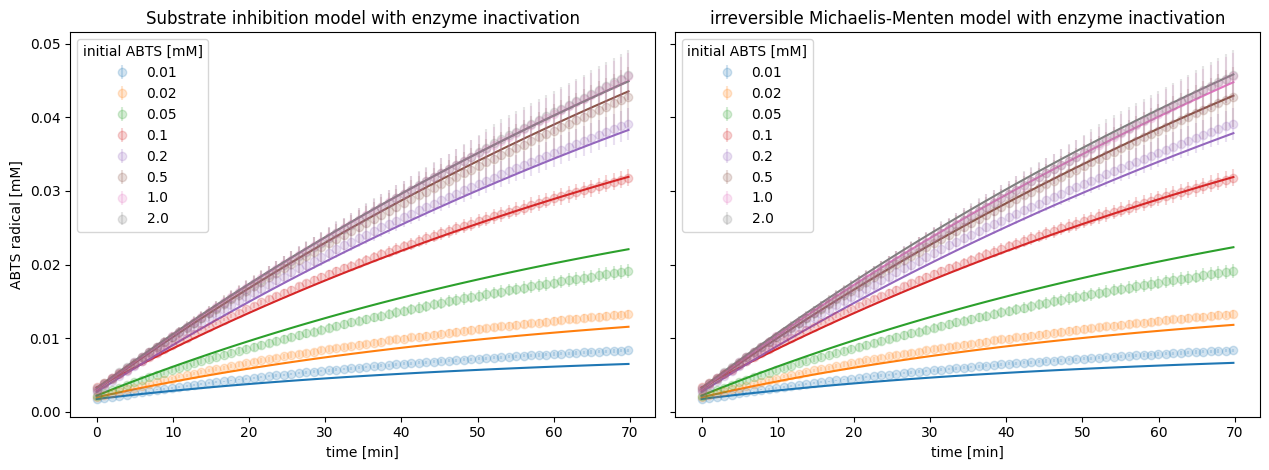

In [190]:
fig, axes = plt.subplots(1,2, figsize=(12.8,4.8), sharey=True, sharex=True)
CotA_kinetics_with_inactivation.visualize("substrate inhibition",ax=axes[0], alpha =.2,\
    title="Substrate inhibition model with enzyme inactivation")
CotA_kinetics_with_inactivation.visualize("irreversible Michaelis Menten",ax=axes[1], alpha =.2,\
    title="irreversible Michaelis-Menten model with enzyme inactivation")

axes[0].set_ylabel("ABTS radical [mM]")
axes[0].set_xlabel("time [min]")
axes[1].set_xlabel("time [min]")
axes[0].legend(title="initial ABTS [mM]")
axes[1].legend(title="initial ABTS [mM]")
plt.tight_layout()

_Fig. XXX: Substrate inhibition and irreversible Michealis-Menten model fitted to CotA reaction data_

Visually, both models in figure xxx describe the observed concentration time-course of ABTS radical formation. For both models, measurement data from enzyme reactions with intial substrate concentrations below 0.1 mM deviate more strongly from the model compared to higher concentrations. Since the measured absorption values were not blanked, all calculated concentrations are falsely increased. This effect is more pronounced for low initial substrate concentrations, since the absoprtion contribution from buffer is lager compared to the accumulating product for low concentrations.  
For reactions with initial substrate concentrations above 0.1 mM, both models describe the progress curve of the reaction. Due to high standard deviation between the prepeat, the true reaction rate at high substrate concentrations is unknown. Therefore, neighter substrate inhibition nor irreversible Michaelis-Menten model were able to clearly represent the experimental data.

#### Kinetic models without enzyme inactivation
In therms of AIC, product inhibition models without considering enzyme inactivation described the data the best, whereas substrate inhibition and irreversible Michaelis-Menten model showed resulted in the highest AIC of all models. In therms of parameter standard deviation, irreversible Michaelis-Menten model showed the lowest relative errors
Non-competitive product inhibition
and irreversible Michaelis-Menten model both showed low standerd deviations on the estimated parameters, whereas product inhibition models showed higher uncertanties on the inhibition parameters. 
Visualizations of the fitted 



All models, except for non-competitive and uncompetitice product inhibition with enzyme inactivation resulted in parameter uncertanties of more than 100 % of the estimated value. 

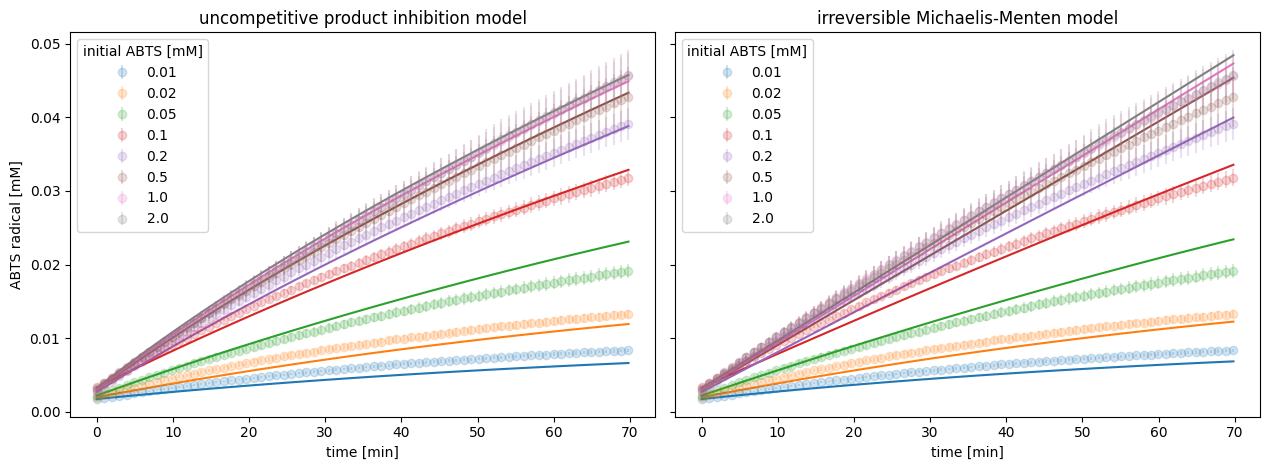

In [189]:
fig, axes = plt.subplots(1,2, figsize=(12.8,4.8), sharey=True, sharex=True)
CotA_kinetics.visualize("uncompetitive product inhibition",ax=axes[0], alpha =.2,\
    title="uncompetitive product inhibition model")
CotA_kinetics.visualize("irreversible Michaelis Menten",ax=axes[1], alpha =.2,\
    title="irreversible Michaelis-Menten model")

axes[0].set_ylabel("ABTS radical [mM]")
axes[0].set_xlabel("time [min]")
axes[1].set_xlabel("time [min]")
axes[0].legend(title="initial ABTS [mM]")
axes[1].legend(title="initial ABTS [mM]")
plt.tight_layout()

## Conclusion

__Low data quality__

Experimental data of the data set for parameter estimation showed low quality. This was indicated by high deviations between experimental repeats as well as 

__Enzyme inactivation__
Parameter estimation with kinetic models considering enzyme inactivation leads to opposing conclusion of the kinetic mechanism. 
Not considerin enzyme inactivation would lead to the assumption of product inhibition